In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import subprocess
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, make_scorer, plot_roc_curve, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from os import system
from IPython.display import Image

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Read the csv file from the local machine

In [3]:
df = pd.read_csv("F:/Drive EE/apply\Study area/Computational Engineering/01 Free University of Berlin/Courses/Machine Learning/machine-learning/adult-dataset.csv")
df.head()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Pre-processing data
We find out that many instances contain a question mark (missing data). Then, we decided to remove this data from our analysis

In [4]:
df = df.replace({' ?': np.nan})
df.dropna(how='any',inplace = True)

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Univariate analysis 

<AxesSubplot:>

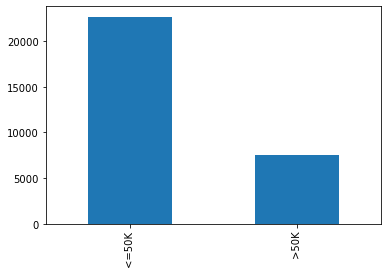

In [6]:
df['class-label'].value_counts().plot(kind = "bar")


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

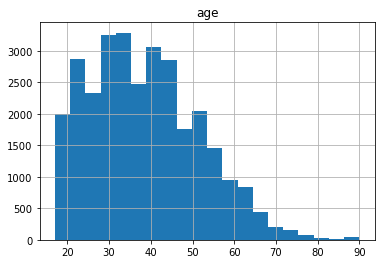

In [6]:
df.hist(column = "age",bins = 20)


<AxesSubplot:>

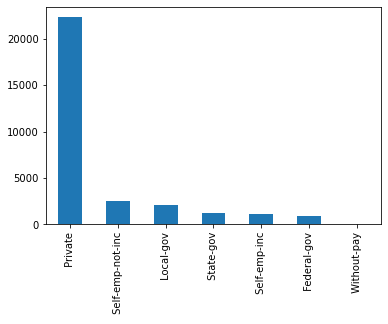

In [8]:
df['workclass'].value_counts().plot(kind = "bar")

<AxesSubplot:>

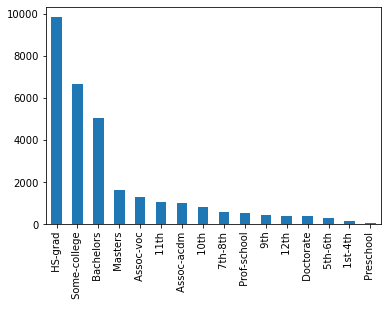

In [9]:
df['education'].value_counts().plot(kind = "bar")

<AxesSubplot:>

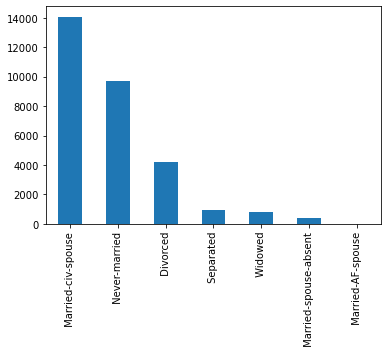

In [10]:
df['marital-status'].value_counts().plot(kind = "bar")

<AxesSubplot:>

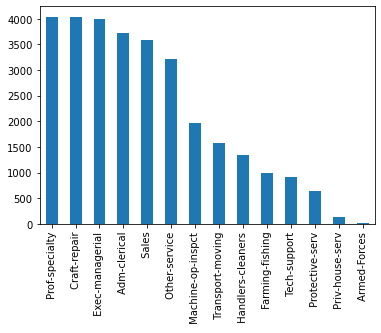

In [11]:
df['occupation'].value_counts().plot(kind = "bar")

<AxesSubplot:>

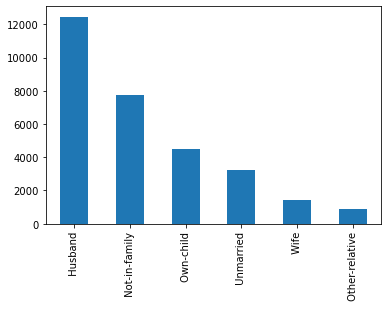

In [12]:
df['relationship'].value_counts().plot(kind = "bar")

<AxesSubplot:>

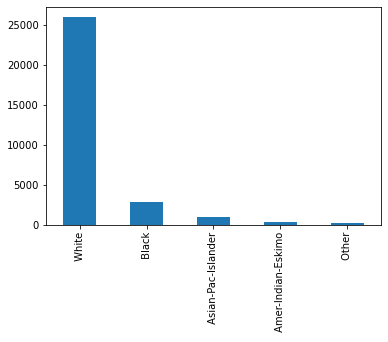

In [13]:
df['race'].value_counts().plot(kind = "bar")

<AxesSubplot:>

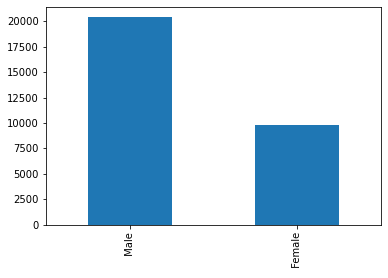

In [14]:
df['sex'].value_counts().plot(kind = "bar")

According to the previous bar chart, it shows that most of the data belong to United-states. Therefore, we can remove it from our analysis.

Because the capital-loss and capital-gain are numeric (most of them distributed in a wide range), we decided to normalize the data. 

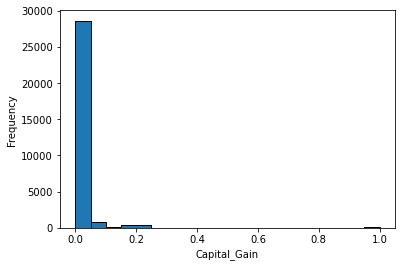

In [14]:
df["capital-gain"]=((df["capital-gain"]-df["capital-gain"].min())/(df["capital-gain"].max()-df["capital-gain"].min()))
bins= [0, 0.05, 0.1, 0.15, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
plt.hist(df["capital-gain"], bins=bins, edgecolor="k")
plt.xlabel('Capital_Gain')
plt.ylabel('Frequency')
plt.show()

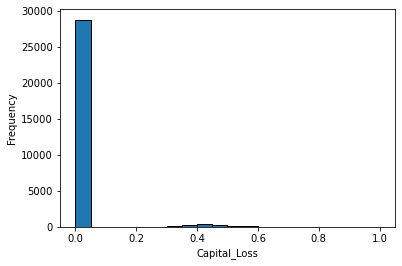

In [9]:
df["capital-loss"]=((df["capital-loss"]-df["capital-loss"].min())/(df["capital-loss"].max()-df["capital-loss"].min()))
bins= [0, 0.05, 0.1, 0.15, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
plt.hist(df["capital-loss"], bins=bins, edgecolor="k")
plt.xlabel('Capital_Loss')
plt.ylabel('Frequency')
plt.show()

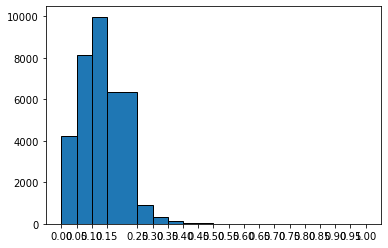

In [11]:
df["fnlwgt"]=((df["fnlwgt"]-df["fnlwgt"].min())/(df["fnlwgt"].max()-df["fnlwgt"].min()))

bins= [0, 0.05, 0.1, 0.15, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
plt.hist(df["fnlwgt"], bins=bins, edgecolor="k")
plt.xticks(bins)
plt.show()

<AxesSubplot:>

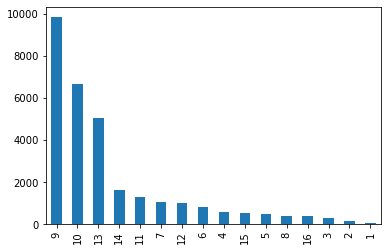

In [18]:
df['education-num'].value_counts().plot(kind = "bar")


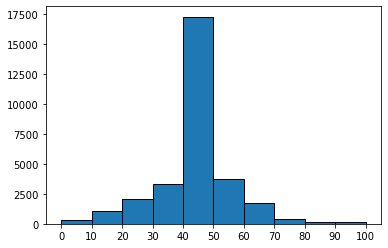

In [12]:
bins= [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(df["hours-per-week"], bins=bins, edgecolor="k")
plt.xticks(bins)
plt.show()




<AxesSubplot:>

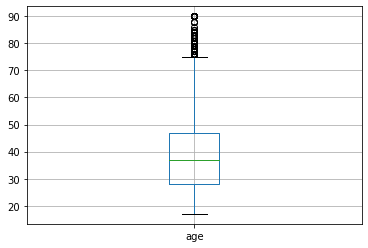

In [20]:
df.boxplot(column=['age'])

<AxesSubplot:>

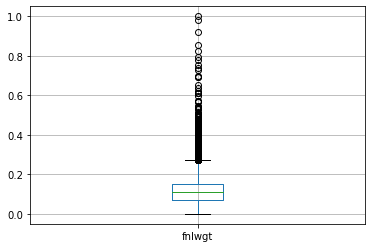

In [21]:
df.boxplot(column=['fnlwgt'])

<AxesSubplot:>

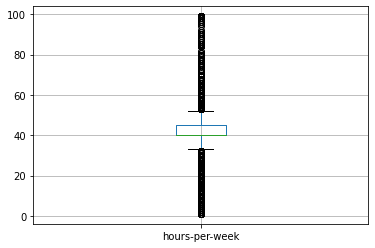

In [22]:
df.boxplot(column=['hours-per-week'])

we can drop 'native-country' and 'workclass', 'capital-loss', and 'capital-gain' as features, because they are very imbalanced(dominated by one value), and we assume that the occupation feature is more important than workclass.

In [13]:
# Drop "native-country","workclass", "capital-loss", "capital-gain" features
df = df.drop(labels=["native-country","workclass", "capital-loss", "capital-gain"],axis=1)
df_bin = pd.get_dummies(df["class-label"])

# Convert class-label to bin
df["class-label"]=df_bin.iloc[:,1]
df

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,class-label
0,39,0.043338,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50,0.047277,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38,0.137244,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53,0.150212,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,28,0.220703,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.165563,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
32557,40,0.095589,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
32558,58,0.093914,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,0
32559,22,0.127620,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,0


In [14]:
# Feature Transformation
df.education = df.education.replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'school')
df.education = df.education.replace(' HS-grad','high school')
df.education = df.education.replace([' Assoc-voc' , ' Assoc-acdm' , ' prof-school' , ' Some-college'],'higher')
df.education = df.education.replace(' Bachelors','undergrad')
df.education = df.education.replace (' Masters','grad')
df.education = df.education.replace(' Doctorate','doc')
df['marital-status'] = df['marital-status'].replace ([' Married-civ-spouse',' Married-AF-spouse'],'married')
df['marital-status'] = df['marital-status'].replace ([' Never-married'],'not-married')
df['marital-status'] = df['marital-status'].replace ([' Divorced',' Separated',' Widowed',' Married-spouse-absent'],'other')
df

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,class-label
0,39,0.043338,undergrad,13,not-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50,0.047277,undergrad,13,married,Exec-managerial,Husband,White,Male,13,0
2,38,0.137244,high school,9,other,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53,0.150212,school,7,married,Handlers-cleaners,Husband,Black,Male,40,0
4,28,0.220703,undergrad,13,married,Prof-specialty,Wife,Black,Female,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.165563,higher,12,married,Tech-support,Wife,White,Female,38,0
32557,40,0.095589,high school,9,married,Machine-op-inspct,Husband,White,Male,40,1
32558,58,0.093914,high school,9,other,Adm-clerical,Unmarried,White,Female,40,0
32559,22,0.127620,high school,9,not-married,Adm-clerical,Own-child,White,Male,20,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class-label', ylabel='count'>

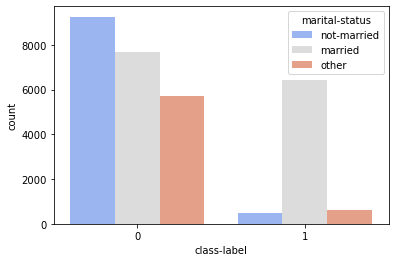

In [15]:
sns.countplot(df['class-label'],palette = 'coolwarm' , hue = 'marital-status' , data=df)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class-label', ylabel='count'>

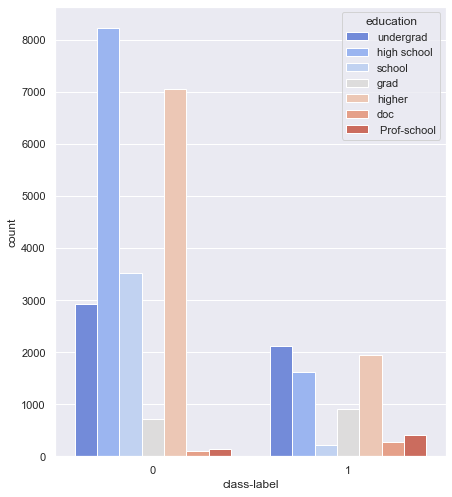

In [60]:
sns.countplot(df['class-label'],palette = 'coolwarm' , hue = 'education' , data=df)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class-label', ylabel='count'>

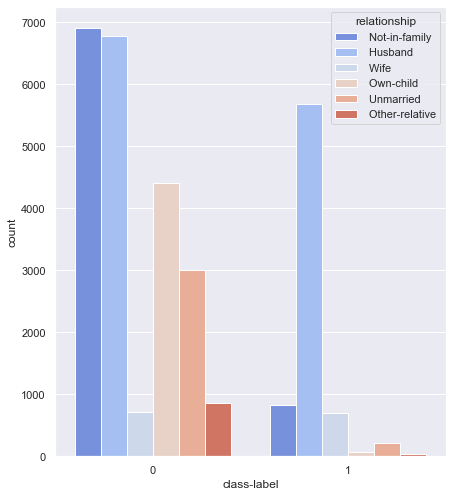

In [61]:
sns.countplot(df['class-label'],palette = 'coolwarm' , hue = 'relationship' , data=df)


# Bivariate analysis

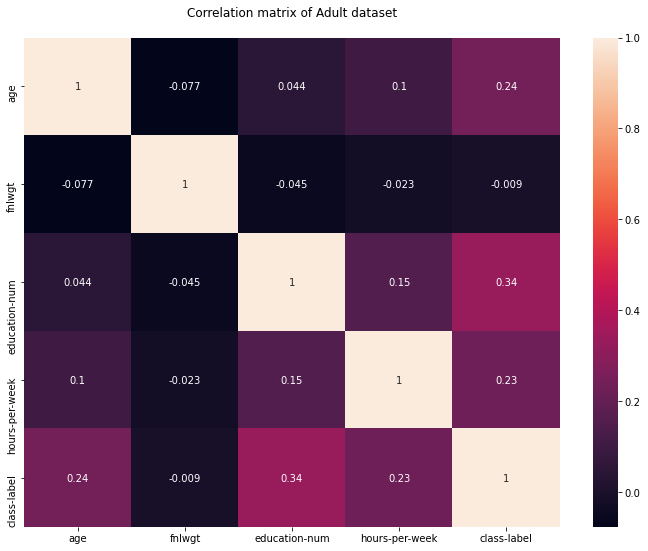

In [28]:

plt.figure(figsize=(12, 9))

hm = sns.heatmap(df.corr(), annot = True)

hm.set(title = "Correlation matrix of Adult dataset\n")

plt.show()

# load test data
 Pre-process the test set as same as train set.

In [16]:
names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class-label"]
df_test = pd.read_csv("F:/Drive EE/apply/Study area/Computational Engineering/01 Free University of Berlin/Courses/Machine Learning/machine-learning/adult_test.test",names = names)
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


# Pre-Prossessing test set data

In [17]:
# Drop the rows which contain question mark.
df_test = df_test.replace({' ?': np.nan})
df_test.dropna(how='any',inplace = True)


# Remove 'native-country' and 'workclass', 'capital-loss', and 'capital-gain' feature.
df_test = df_test.drop(labels=["native-country","workclass", "capital-loss", "capital-gain"],axis=1)

# Normilize fnlwgt
df_test["fnlwgt"]=((df_test["fnlwgt"]-df_test["fnlwgt"].min())/(df_test["fnlwgt"].max()-df_test["fnlwgt"].min()))

# Convert "class-label" feature to bin
df_bin = pd.get_dummies(df_test["class-label"])
df_test["class-label"]=df_bin.iloc[:,1]
df_test

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,class-label
1,25,0.144430,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,0
2,38,0.051677,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,50.0,0
3,28,0.219011,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,40.0,1
4,44,0.099418,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40.0,1
6,34,0.125398,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16276,33,0.156895,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,40.0,0
16277,39,0.136723,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,36.0,0
16279,38,0.244762,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,50.0,0
16280,44,0.047666,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40.0,0


In [18]:
# Feature Transformation of test set
df_test.education = df_test.education.replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'school')
df_test.education = df_test.education.replace(' HS-grad','high school')
df_test.education = df_test.education.replace([' Assoc-voc' , ' Assoc-acdm' , ' prof-school' , ' Some-college'],'higher')
df_test.education = df_test.education.replace(' Bachelors','undergrad')
df_test.education = df_test.education.replace (' Masters','grad')
df_test.education = df_test.education.replace(' Doctorate','doc')
df_test['marital-status'] = df_test['marital-status'].replace ([' Married-civ-spouse',' Married-AF-spouse'],'married')
df_test['marital-status'] = df_test['marital-status'].replace ([' Never-married'],'not-married')
df_test['marital-status'] = df_test['marital-status'].replace ([' Divorced',' Separated',' Widowed',' Married-spouse-absent'],'other')
df_test

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,class-label
1,25,0.144430,school,7.0,not-married,Machine-op-inspct,Own-child,Black,Male,40.0,0
2,38,0.051677,high school,9.0,married,Farming-fishing,Husband,White,Male,50.0,0
3,28,0.219011,higher,12.0,married,Protective-serv,Husband,White,Male,40.0,1
4,44,0.099418,higher,10.0,married,Machine-op-inspct,Husband,Black,Male,40.0,1
6,34,0.125398,school,6.0,not-married,Other-service,Not-in-family,White,Male,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16276,33,0.156895,undergrad,13.0,not-married,Prof-specialty,Own-child,White,Male,40.0,0
16277,39,0.136723,undergrad,13.0,other,Prof-specialty,Not-in-family,White,Female,36.0,0
16279,38,0.244762,undergrad,13.0,married,Prof-specialty,Husband,White,Male,50.0,0
16280,44,0.047666,undergrad,13.0,other,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40.0,0


In [19]:
# label encoding for train set
df['education'] = df.apply(LabelEncoder().fit_transform)['education']
df['marital-status'] = df.apply(LabelEncoder().fit_transform)['marital-status']
df['occupation'] = df.apply(LabelEncoder().fit_transform)['occupation']
df['relationship'] = df.apply(LabelEncoder().fit_transform)['relationship']
df['race'] = df.apply(LabelEncoder().fit_transform)['race']
df[ 'sex'] = df.apply(LabelEncoder().fit_transform)['sex']

# label encoding for test set
df_test['education'] = df_test.apply(LabelEncoder().fit_transform)['education']
df_test['marital-status'] = df_test.apply(LabelEncoder().fit_transform)['marital-status']
df_test['occupation'] = df_test.apply(LabelEncoder().fit_transform)['occupation']
df_test['relationship'] = df_test.apply(LabelEncoder().fit_transform)['relationship']
df_test['race'] = df_test.apply(LabelEncoder().fit_transform)['race']
df_test[ 'sex'] = df_test.apply(LabelEncoder().fit_transform)['sex']
df

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,class-label
0,39,0.043338,6,13,1,0,1,4,1,40,0
1,50,0.047277,6,13,0,3,0,4,1,13,0
2,38,0.137244,3,9,2,5,1,4,1,40,0
3,53,0.150212,5,7,0,5,0,2,1,40,0
4,28,0.220703,6,13,0,9,5,2,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.165563,4,12,0,12,5,4,0,38,0
32557,40,0.095589,3,9,0,6,0,4,1,40,1
32558,58,0.093914,3,9,2,0,4,4,0,40,0
32559,22,0.127620,3,9,1,0,3,4,1,20,0


In [20]:
# Specify Train data
x_train = df.iloc[:,0:9]
y_train = df.iloc[:,10]

# Specify Test data
x_test = df_test.iloc[:,0:9]
y_test = df_test.iloc[:,10]


## 3.3 Classification

# 3.3.1 Decision Trees Classification

In [34]:
#Train a DT classifier with gini index

clf_gini = tree.DecisionTreeClassifier(random_state=1, criterion="gini")
clf_gini = clf_gini.fit(x_train,y_train)
y_pred = clf_gini.predict(x_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     11360
           1       0.52      0.53      0.53      3700

    accuracy                           0.77     15060
   macro avg       0.69      0.69      0.69     15060
weighted avg       0.77      0.77      0.77     15060



# 3.3.1.1 Model parameter tuning 


In [60]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
serach_space ={'criterion': ['gini','entropy'],
                'max_depth': [7, 8, 9], 
                'min_samples_split': [4, 5], 
                'min_samples_leaf': [4, 5], 
                'max_leaf_nodes':[20, 25, 30]}
grid = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=serach_space, scoring=['accuracy', 'precision', 'recall','f1_macro'], 
refit='accuracy', cv=10, verbose=5, 
error_score='raise')

# fitting the model for grid search
grid.fit(x_train, y_train)
best_dts_model = grid.best_estimator_
print ('The best parameters for evaluation are as per following:')
print (grid.best_params_)
print("the accuracy of the best model is  %0.2f" % grid.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=4; accuracy: (test=0.816) f1_macro: (test=0.737) precision: (test=0.661) recall: (test=0.538) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=4; accuracy: (test=0.817) f1_macro: (test=0.734) precision: (test=0.674) recall: (test=0.517) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=4; accuracy: (test=0.825) f1_macro: (test=0.752) precision: (test=0.676) recall: (test=0.569) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=4; accuracy: (test=0.812) f1_macro: (test=0.739) precision: (test=0.637) recall: (test=0.568) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_leaf=4, min

# 3.3.1.2 Evaluation setup & measures


0.83 accuracy with a standard deviation of 0.01
0.75 f1_macro with a standard deviation of 0.01
0.91 sensitivity with a standard deviation of 0.01
0.56 specificity with a standard deviation of 0.02
The Confusion Matrix is:
[[20726  1928]
 [ 3329  4179]]


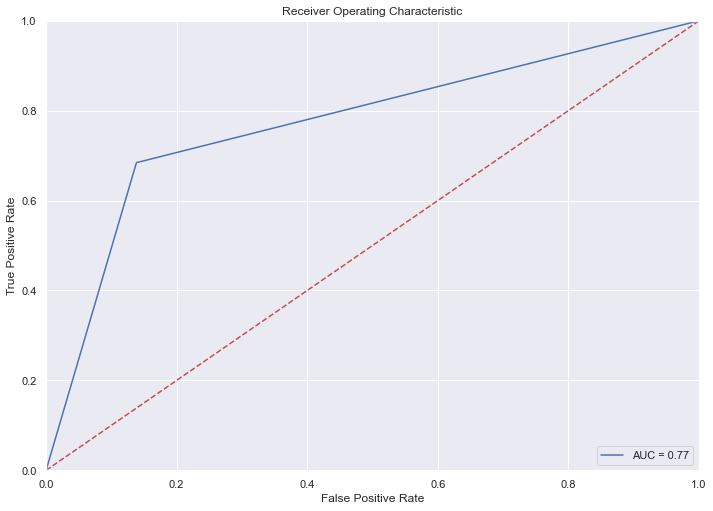

In [59]:

# Measuring Evaluation using accuracy
scores = cross_val_score(best_dts_model, x_train, y_train, cv=10, scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using f1_macro
scores = cross_val_score(best_dts_model, x_train, y_train, cv=10, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using sensitivity
sensitivity = make_scorer(recall_score, pos_label=0)
scores=cross_val_score(best_dts_model, x_train, y_train, cv=10, scoring=sensitivity)
print("%0.2f sensitivity with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using specificity
specificity = make_scorer(recall_score, pos_label=1)
scores=cross_val_score(best_dts_model, x_train, y_train, cv=10, scoring=specificity)
print("%0.2f specificity with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# confusion matrix 
y_eval = cross_val_predict(best_dts_model, x_train, y_train, cv=10)
print ('The Confusion Matrix is:')
print (confusion_matrix(y_train, y_eval))

# plot AUC
fpr, tpr, threshold = roc_curve(y_eval, y_train)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

To summarize, we tuned the Decision Tree Classifier using input parameters. We found that "max_depth" and "max_leaf_nodes" are the most effective parameters which increased the accuracy of our model. It is worth mentioning that using "gini" or "entropy" criteria didn't change the accuracy of the mentioned model.

In [67]:
# predict x_test from Evaluated model in the previous section and calculate precision, recall, f1-score and accuracy
# Construct the model based on the tuned parameters
from sklearn import datasets, tree
best_dts_model = tree.DecisionTreeClassifier(criterion="gini", max_depth = 9, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=30)
best_dts_model = best_dts_model.fit(x_train,y_train)
y_pred = best_dts_model.predict(x_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     11360
           1       0.72      0.44      0.54      3700

    accuracy                           0.82     15060
   macro avg       0.78      0.69      0.72     15060
weighted avg       0.81      0.82      0.80     15060



By comparing the measuring criteria before and after evaluation, it is obvious that precision, recall, f1-score, and accuracy have been improved by

# 3.3.1.3 Model interpretation/visualization


To visualize our model, we used dimention redction.
This process is really costly and we just used the 2000 instances of our test data.

In [53]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Reduce the dimention of x_test
x_test_num = x_train.to_numpy()
dist_manhattan = manhattan_distances(x_test_num[0:2000])
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
x_test_num_L1 = mds.fit_transform(dist_manhattan)

Model visualization based on best DTs and Dimensionality reduction

<AxesSubplot:xlabel='dim_1', ylabel='dim_2'>

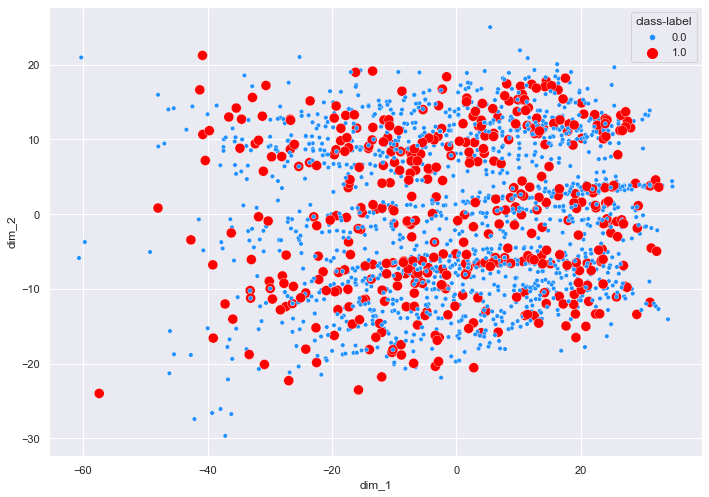

In [55]:
# Visualize the DTs
y_pred_num = np.expand_dims(y_pred[0:2000], axis=1)
y_pred_num = np.append(x_test_num_L1, y_pred_num, axis=1)
df_vis_dts = pd. DataFrame(y_pred_num, columns=['dim_1', 'dim_2', 'class-label'])

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=df_vis_dts , x="dim_1", y="dim_2", hue="class-label", size="class-label",
    sizes=(100, 20), palette=['dodgerblue','red'], legend="full")

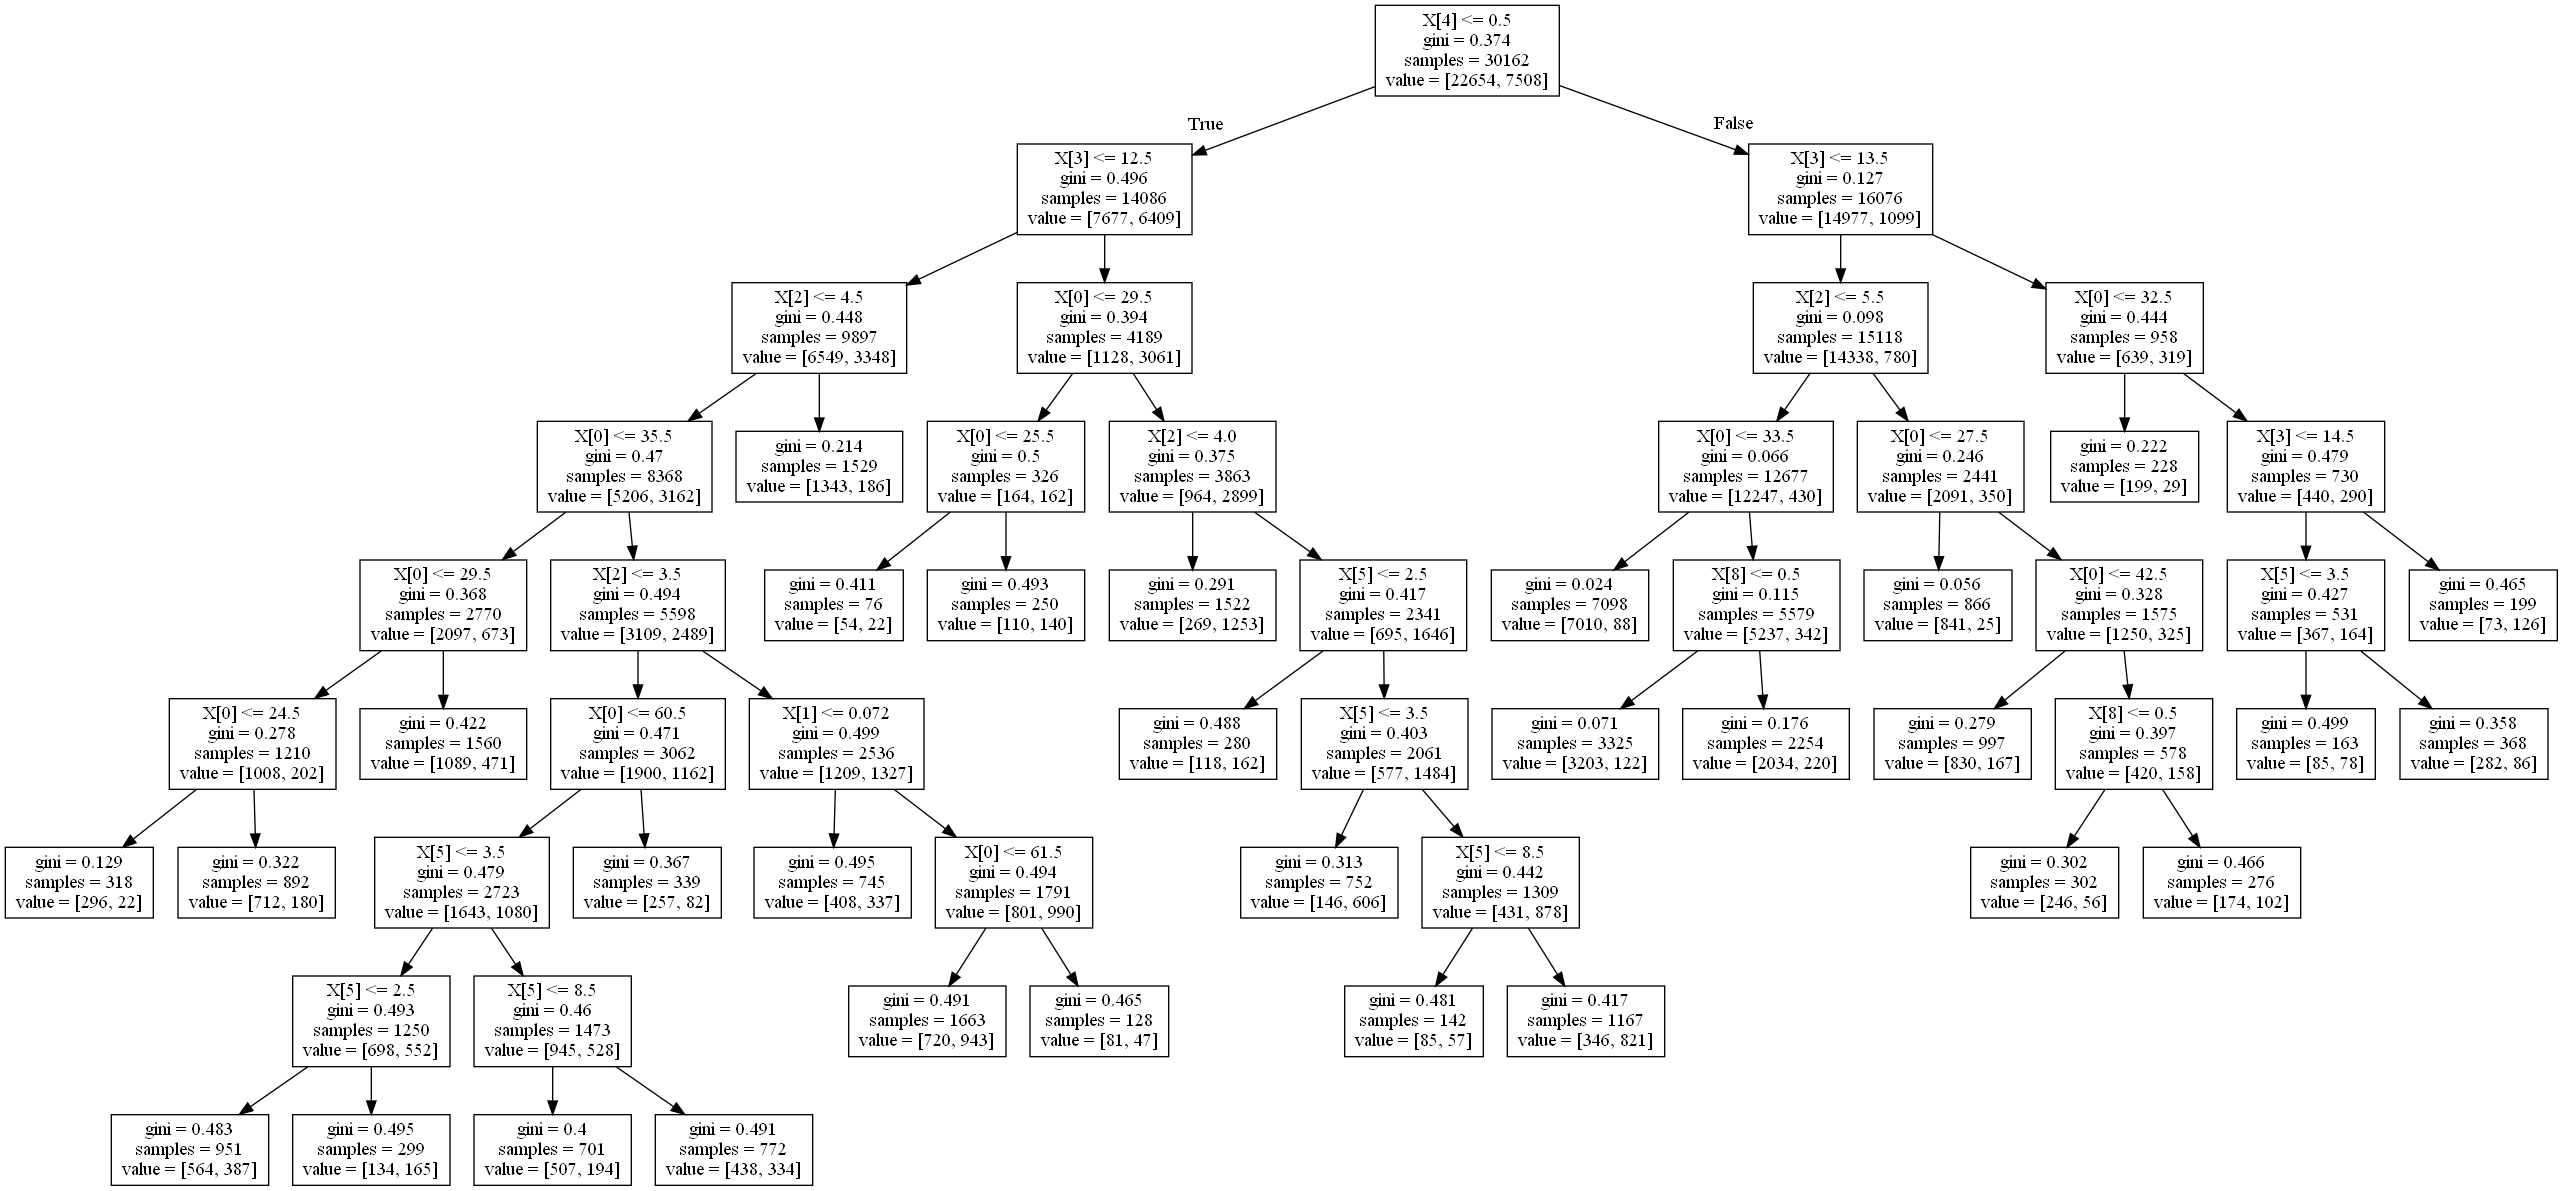

In [58]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'
tree.export_graphviz(best_dts_model, out_file='tree.dot')
system("dot -Tpng tree.dot -o tree1.png")
Image("tree1.png")

# 3.3.1.4 Discriminative behaviour

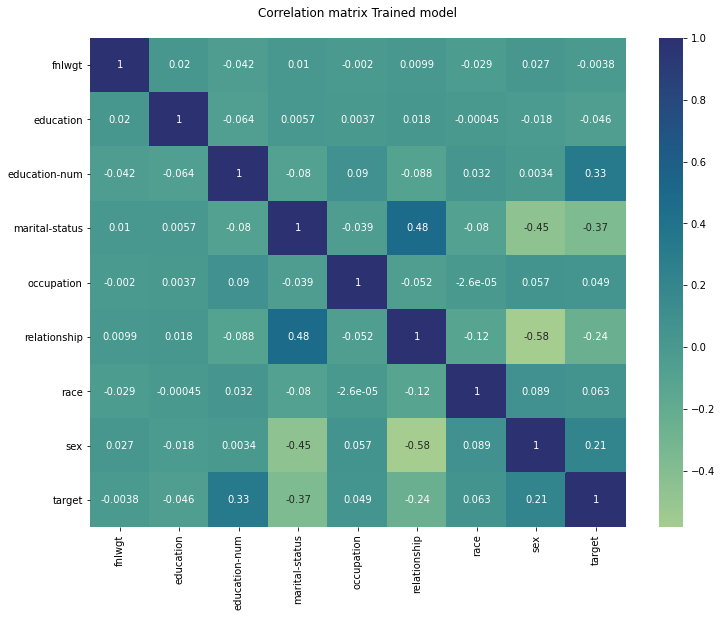

In [ ]:
all_features= pd.concat([x_train,x_test])
y_pred = clf_gini.predict(all_features)
final_df = all_features.assign(target=y_pred)

plt.figure(figsize=(12, 9))
hm = sns.heatmap(final_df.corr(), annot = True, cmap="crest")
hm.set(title = "Correlation matrix Trained model\n")
plt.show()

According to the above Correlation matrix of the model, we can see that there is a positive correlation between "sex" and "target" which means this model can not avoid discrimination against individuals in the "sex" feature. However, this model can avoid discrimination against "race" because the correlation is negligible.

# 3.3.2 KNNs Classification

In [ ]:
# Build KNNs model
from sklearn import neighbors
clf_knn = neighbors.KNeighborsClassifier()
clf_knn.fit(x_train, y_train)
y_pred = clf_knn.predict(x_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     11360
           1       0.61      0.55      0.58      3700

    accuracy                           0.80     15060
   macro avg       0.73      0.72      0.73     15060
weighted avg       0.80      0.80      0.80     15060



# 3.3.2.1 Model parameter tuning

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import neighbors
# defining parameter range
skf = StratifiedKFold(n_splits=10)

serach_space ={'n_neighbors':[3,5,10,15,20,50],
              'weights':['uniform','distance'],
              'metric':['euclidean','manhattan']}
grid = GridSearchCV(estimator=neighbors.KNeighborsClassifier(), param_grid=serach_space, scoring=['accuracy', 'precision', 'recall','f1_macro'], 
refit='accuracy', cv=skf, verbose=1, n_jobs = -1,
error_score='raise')

# fitting the model for grid search
grid.fit(x_train, y_train)
best_knn_model = grid.best_estimator_
print ('The best parameters for evaluation are as per following:')
print (grid.best_params_)
print("the accuracy of the best model is  %0.2f" % grid.best_score_)




Fitting 10 folds for each of 24 candidates, totalling 240 fits
The best parameters for evaluation are as per following:
{'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'uniform'}
the accuracy of the best model is  0.82


# 3.3.2.2 Evaluation setup 

0.82 accuracy with a standard deviation of 0.01
0.75 f1_macro with a standard deviation of 0.01
0.91 sensitivity with a standard deviation of 0.01
0.55 specificity with a standard deviation of 0.01
The Confusion Matrix is:
[[20669  1985]
 [ 3383  4125]]


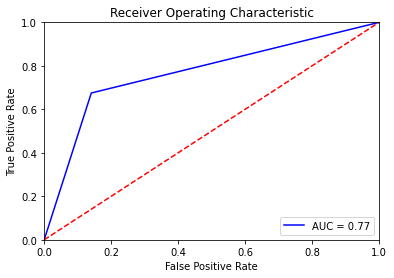

In [ ]:

# Measuring Evaluation using accuracy
scores = cross_val_score(best_knn_model, x_train, y_train, cv=10, scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using f1_macro
scores = cross_val_score(best_knn_model, x_train, y_train, cv=10, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using sensitivity
sensitivity = make_scorer(recall_score, pos_label=0)
scores=cross_val_score(best_knn_model, x_train, y_train, cv=10, scoring=sensitivity)
print("%0.2f sensitivity with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using specificity
specificity = make_scorer(recall_score, pos_label=1)
scores=cross_val_score(best_knn_model, x_train, y_train, cv=10, scoring=specificity)
print("%0.2f specificity with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# confusion matrix 
y_eval = cross_val_predict(best_knn_model, x_train, y_train, cv=10)
print ('The Confusion Matrix is:')
print (confusion_matrix(y_train, y_eval))

# plot AUC
fpr, tpr, threshold = roc_curve(y_eval, y_train)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The parameters which affect our model are: the neighbors (k), how the label is predicted in relation to the labels of the k nearest neighbours, and what the distance metric is. For example, acording to our parameter tuning above, the best metric for choosing the label is not the majority, but the weighted majority, considering the distances.

In [73]:
# Construct the model based on the tuned parameters
from sklearn import neighbors
best_knn_model = neighbors.KNeighborsClassifier(metric = 'manhattan', n_neighbors = 50, weights = 'uniform')
best_knn_model = best_knn_model.fit(x_train,y_train)
y_pred = best_knn_model.predict(x_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     11360
           1       0.66      0.55      0.60      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.73      0.74     15060
weighted avg       0.81      0.82      0.81     15060



# 3.3.2.3 Model interpretation/visualization

To visualize our model, we used dimention redction.
This process is really costly and we just used the 2000 instances of our test data.

In [71]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Reduce the dimention of x_test
x_test_num = x_train.to_numpy()
dist_manhattan = manhattan_distances(x_test_num[0:2000])
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
x_test_num_L1 = mds.fit_transform(dist_manhattan)

Model visualization based on best KNN and Dimensionality reduction

<AxesSubplot:xlabel='dim_1', ylabel='dim_2'>

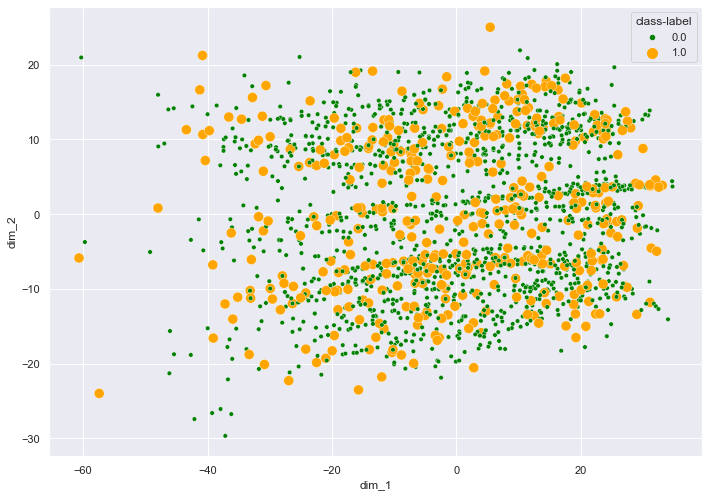

In [75]:
# Visualize the KNN
y_pred_num = np.expand_dims(y_pred[0:2000], axis=1)
y_pred_num = np.append(x_test_num_L1, y_pred_num, axis=1)
df_vis_dts = pd. DataFrame(y_pred_num, columns=['dim_1', 'dim_2', 'class-label'])

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=df_vis_dts , x="dim_1", y="dim_2", hue="class-label", size="class-label",
    sizes=(100, 20), palette=['green','orange'], legend="full")

# 3.3.2.4 Discriminative behaviour

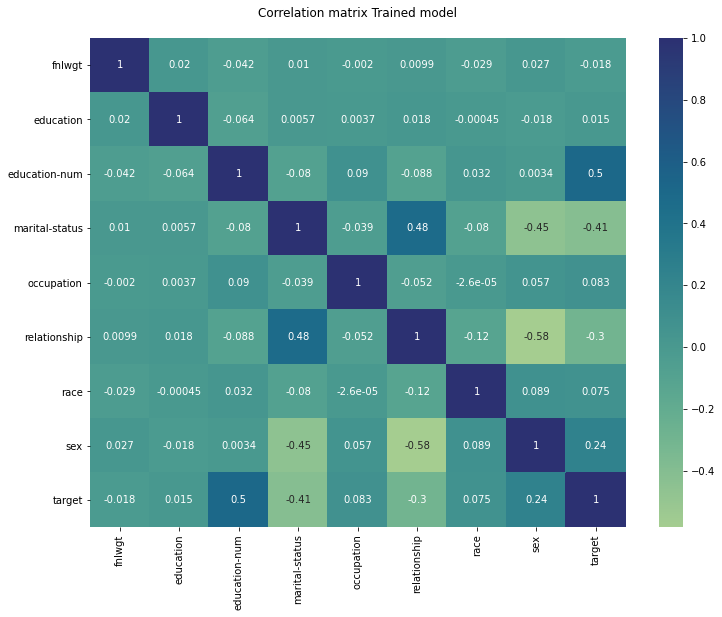

In [ ]:
all_features= pd.concat([x_train,x_test])
y_pred = best_knn_model.predict(all_features)
final_df = all_features.assign(target=y_pred)

plt.figure(figsize=(12, 9))
hm = sns.heatmap(final_df.corr(), annot = True, cmap="crest")
hm.set(title = "Correlation matrix Trained model\n")
plt.show()

# 3.3.3 NBs Classification

In [ ]:
# Build NBs model
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(x_train, y_train)
y_pred = clf_NB.predict(x_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     11360
           1       0.53      0.69      0.60      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.74      0.72     15060
weighted avg       0.80      0.77      0.78     15060



# 3.3.3.1 Model parameter tuning

In [ ]:
# defining parameter range
skf = StratifiedKFold(n_splits=10)

serach_space ={'var_smoothing': np.logspace(0, -9, num = 100)}
grid = GridSearchCV(estimator=GaussianNB(), param_grid=serach_space, scoring=['accuracy', 'recall','f1_macro'], 
refit='accuracy', cv=skf, verbose=1,n_jobs = -1, 
error_score='raise')

# fitting the model for grid search
grid.fit(x_train, y_train)
best_NB_model = grid.best_estimator_
print ('The best parameters for evaluation are as per following:')
print (grid.best_params_)
print("the accuracy of the best model is  %0.2f" % grid.best_score_)




Fitting 10 folds for each of 100 candidates, totalling 1000 fits
The best parameters for evaluation are as per following:
{'var_smoothing': 0.004328761281083057}
the accuracy of the best model is  0.81


# 3.3.3.2 Evaluation setup 

0.81 accuracy with a standard deviation of 0.01
0.71 f1_macro with a standard deviation of 0.01
0.93 sensitivity with a standard deviation of 0.01
0.44 specificity with a standard deviation of 0.01
The Confusion Matrix is:
[[21077  1577]
 [ 4177  3331]]


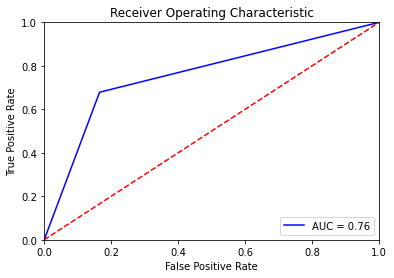

In [ ]:
# Measuring Evaluation using accuracy
scores = cross_val_score(best_NB_model, x_train, y_train, cv=10, scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using f1_macro
scores = cross_val_score(best_NB_model, x_train, y_train, cv=10, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using sensitivity
sensitivity = make_scorer(recall_score, pos_label=0)
scores=cross_val_score(best_NB_model, x_train, y_train, cv=10, scoring=sensitivity)
print("%0.2f sensitivity with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using specificity
specificity = make_scorer(recall_score, pos_label=1)
scores=cross_val_score(best_NB_model, x_train, y_train, cv=10, scoring=specificity)
print("%0.2f specificity with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# confusion matrix 
y_eval = cross_val_predict(best_NB_model, x_train, y_train, cv=10)
print ('The Confusion Matrix is:')
print (confusion_matrix(y_train, y_eval))

# plot AUC
fpr, tpr, threshold = roc_curve(y_eval, y_train)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:
# predict x_test from Evaluate model in the previous section and calculate precision, recall, f1-score and accuracy
from sklearn.naive_bayes import GaussianNB
best_NB_model = GaussianNB(var_smoothing = 0.004328761281083057)
best_NB_model = best_NB_model.fit(x_train,y_train)
y_pred = best_NB_model.predict(x_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     11360
           1       0.66      0.55      0.60      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.73      0.74     15060
weighted avg       0.81      0.82      0.81     15060



# 3.3.3.3 Model interpretation/visualization

To visualize our model, we used dimention redction.
This process is really costly and we just used the 2000 instances of our test data.

In [78]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Reduce the dimention of x_test
x_test_num = x_train.to_numpy()
dist_manhattan = manhattan_distances(x_test_num[0:2000])
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
x_test_num_L1 = mds.fit_transform(dist_manhattan)

Model visualization based on best NB and Dimensionality reduction

<AxesSubplot:xlabel='dim_1', ylabel='dim_2'>

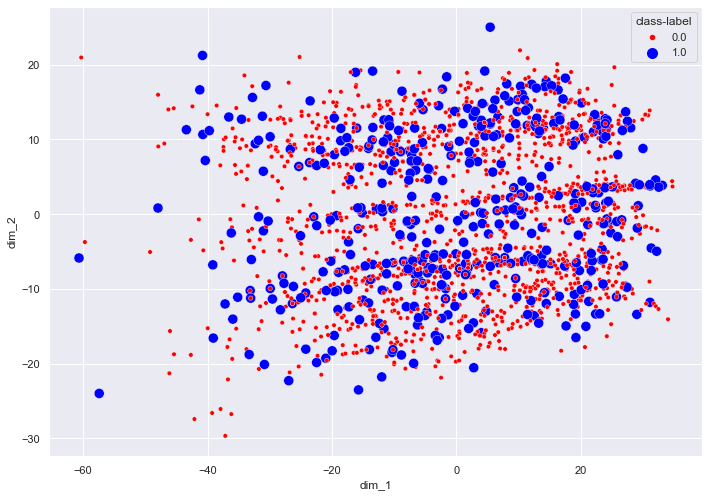

In [81]:
# Visualize the NB
y_pred_num = np.expand_dims(y_pred[0:2000], axis=1)
y_pred_num = np.append(x_test_num_L1, y_pred_num, axis=1)
df_vis_dts = pd. DataFrame(y_pred_num, columns=['dim_1', 'dim_2', 'class-label'])

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=df_vis_dts , x="dim_1", y="dim_2", hue="class-label", size="class-label",
    sizes=(100, 20), palette=['red','blue'], legend="full")

# 3.3.3.4 Discriminative behaviour

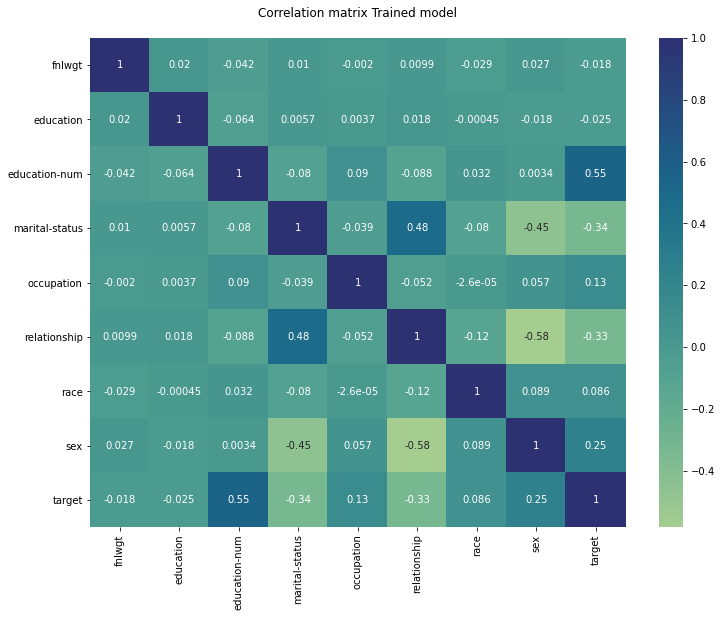

In [ ]:
all_features= pd.concat([x_train,x_test])
y_pred = best_NB_model.predict(all_features)
final_df = all_features.assign(target=y_pred)

plt.figure(figsize=(12, 9))
hm = sns.heatmap(final_df.corr(), annot = True, cmap="crest")
hm.set(title = "Correlation matrix Trained model\n")
plt.show()

# 3.3.4 Classification SVMs

In [ ]:
#Train a SVM classifier
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
clf_svm = svclassifier.fit(x_train, y_train)
y_pred = clf_svm.predict(x_test)
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.68      0.46      0.55      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.70      0.72     15060
weighted avg       0.80      0.81      0.80     15060



# 3.3.4.1 Model parameter tuning

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END C=0.5, degree=2, gamma=0.001, kernel=poly; accuracy: (test=0.808) f1_macro: (test=0.696) precision: (test=0.695) recall: (test=0.406) total time=  18.2s
[CV 2/10] END C=0.5, degree=2, gamma=0.001, kernel=poly; accuracy: (test=0.809) f1_macro: (test=0.693) precision: (test=0.716) recall: (test=0.389) total time=  17.2s
[CV 3/10] END C=0.5, degree=2, gamma=0.001, kernel=poly; accuracy: (test=0.817) f1_macro: (test=0.706) precision: (test=0.743) recall: (test=0.405) total time=  18.0s
[CV 4/10] END C=0.5, degree=2, gamma=0.001, kernel=poly; accuracy: (test=0.808) f1_macro: (test=0.699) precision: (test=0.693) recall: (test=0.412) total time=  18.4s
[CV 5/10] END C=0.5, degree=2, gamma=0.001, kernel=poly; accuracy: (test=0.819) f1_macro: (test=0.712) precision: (test=0.743) recall: (test=0.419) total time=  17.9s
[CV 6/10] END C=0.5, degree=2, gamma=0.001, kernel=poly; accuracy: (test=0.818) f1_macro: (test=0.710)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 10/10] END C=0.3, gamma=0.003, kernel=sigmoid; accuracy: (test=0.751) f1_macro: (test=0.429) precision: (test=0.000) recall: (test=0.000) total time=  33.5s
[CV 1/10] END C=0.5, gamma=0.001, kernel=rbf; accuracy: (test=0.806) f1_macro: (test=0.692) precision: (test=0.696) recall: (test=0.394) total time=  25.9s
[CV 2/10] END C=0.5, gamma=0.001, kernel=rbf; accuracy: (test=0.804) f1_macro: (test=0.685) precision: (test=0.697) recall: (test=0.379) total time=  25.6s
[CV 3/10] END C=0.5, gamma=0.001, kernel=rbf; accuracy: (test=0.815) f1_macro: (test=0.704) precision: (test=0.733) recall: (test=0.405) total time=  26.5s
[CV 4/10] END C=0.5, gamma=0.001, kernel=rbf; accuracy: (test=0.806) f1_macro: (test=0.694) precision: (test=0.689) recall: (test=0.403) total time=  25.7s
[CV 5/10] END C=0.5, gamma=0.001, kernel=rbf; accuracy: (test=0.817) f1_macro: (test=0.709) precision: (test=0.732) recall: (test=0.418) total time=  26.3s
[CV 6/10] END C=0.5, gamma=0.001, kernel=rbf; accuracy: (te

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 10/10] END C=0.5, gamma=0.003, kernel=sigmoid; accuracy: (test=0.751) f1_macro: (test=0.429) precision: (test=0.000) recall: (test=0.000) total time=  33.1s
The best parameters for evaluation are as per following:
{'C': 1, 'degree': 3, 'gamma': 0.003, 'kernel': 'poly'}
the accuracy of the best model is  0.82
The Confusion Matrix is:
[[21381  1273]
 [ 4218  3290]]


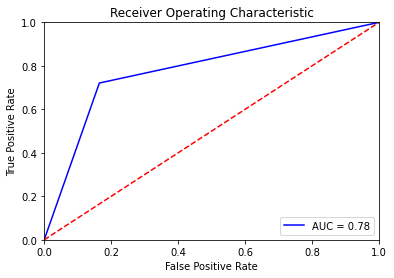

In [ ]:

# Parameters Tunning and Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pickle


# defining parameter range
svm_linear = {'C': [0.2, 0.3], 
              'kernel': ['linear']} 
svm_others = {'C': [0.3, 0.5],
              'gamma': [0.001, 0.003], 
              'kernel': ['rbf', 'sigmoid']}

svm_poly =  {'C': [0.5, 1], 'gamma': [0.001, 0.003], 'kernel': ['poly'], 'degree': [2, 3]}  # 1, 0.001, 5 acc 0.81

serach_space = [svm_poly, svm_linear, svm_others]  
 
grid = GridSearchCV(estimator=SVC(), param_grid=serach_space, scoring=['accuracy', 'precision', 'recall','f1_macro'], 
refit='accuracy', cv=10, verbose=5, 
error_score='raise')

# fitting the model for grid search
grid.fit(x_train, y_train)
best_svm_model = grid.best_estimator_
print ('The best parameters for evaluation are as per following:')
print (grid.best_params_)
print("the accuracy of the best model is  %0.2f" % grid.best_score_)

filename_svm = 'best_svm_model.sav'
pickle.dump(best_svm_model, open(filename_svm, 'wb'))

# confusion matrix 
y_eval_svm = cross_val_predict(best_svm_model, x_train, y_train, cv=10)

print ('The Confusion Matrix is:')
print (confusion_matrix(y_train, y_eval_svm))

# plot AUC
fpr, tpr, threshold = roc_curve(y_eval_svm, y_train)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3.3.4.2 Evaluation setup 

0.82 accuracy with a standard deviation of 0.01
0.72 f1_macro with a standard deviation of 0.01
0.94 sensitivity with a standard deviation of 0.01
0.44 specificity with a standard deviation of 0.01
The Confusion Matrix is:
[[21381  1273]
 [ 4218  3290]]


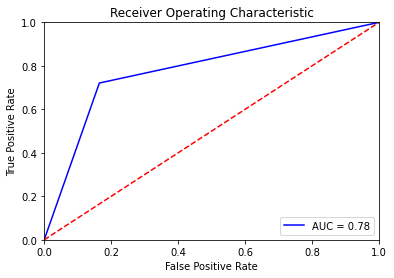

In [ ]:
# Measuring Evaluation using accuracy
scores = cross_val_score(best_svm_model, x_train, y_train, cv=10, scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using f1_macro
scores = cross_val_score(best_svm_model, x_train, y_train, cv=10, scoring='f1_macro')
print("%0.2f f1_macro with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using sensitivity
sensitivity = make_scorer(recall_score, pos_label=0)
scores=cross_val_score(best_svm_model, x_train, y_train, cv=10, scoring=sensitivity)
print("%0.2f sensitivity with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Measuring Evaluation using specificity
specificity = make_scorer(recall_score, pos_label=1)
scores=cross_val_score(best_svm_model, x_train, y_train, cv=10, scoring=specificity)
print("%0.2f specificity with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# confusion matrix 
y_eval = cross_val_predict(best_svm_model, x_train, y_train, cv=10)
print ('The Confusion Matrix is:')
print (confusion_matrix(y_train, y_eval))

# plot AUC
fpr, tpr, threshold = roc_curve(y_eval, y_train)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
# predict x_test from Evaluate model in the previous section and calculate precision, recall, f1-score and accuracy
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly' , C= 1, degree= 3, gamma= 0.003)
best_svm_model = svclassifier.fit(x_train, y_train)

y_pred = best_svm_model.predict(x_test)
print(classification_report(y_true = y_test, y_pred = y_pred))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89     11360
           1       0.71      0.44      0.55      3700

    accuracy                           0.82     15060
   macro avg       0.78      0.69      0.72     15060
weighted avg       0.81      0.82      0.80     15060



# 3.3.4.3 Model interpretation/visualization

To visualize our model, we used dimention redction.
This process is really costly and we just used the 2000 instances of our test data.

In [83]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Reduce the dimention of x_test
x_test_num = x_train.to_numpy()
dist_manhattan = manhattan_distances(x_test_num[0:2000])
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
x_test_num_L1 = mds.fit_transform(dist_manhattan)

Model visualization based on best SVM and Dimensionality reduction

<AxesSubplot:xlabel='dim_1', ylabel='dim_2'>

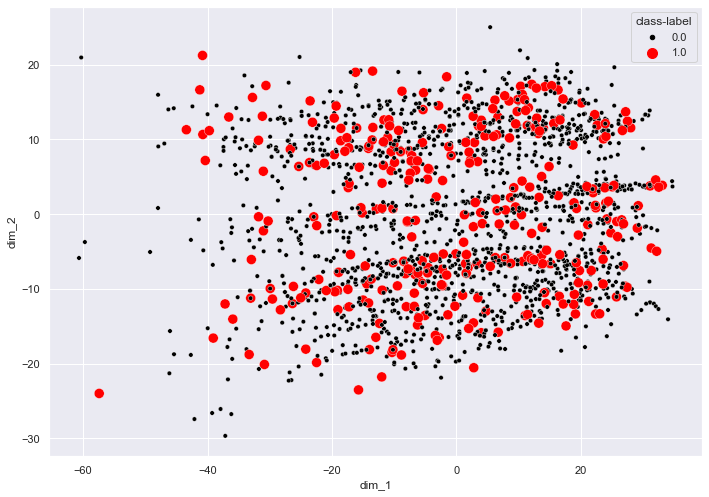

In [84]:
# Visualize the SVM
y_pred_num = np.expand_dims(y_pred[0:2000], axis=1)
y_pred_num = np.append(x_test_num_L1, y_pred_num, axis=1)
df_vis_dts = pd. DataFrame(y_pred_num, columns=['dim_1', 'dim_2', 'class-label'])

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=df_vis_dts , x="dim_1", y="dim_2", hue="class-label", size="class-label",
    sizes=(100, 20), palette=['black','red'], legend="full")

# 3.3.4.4 Discriminative behaviour

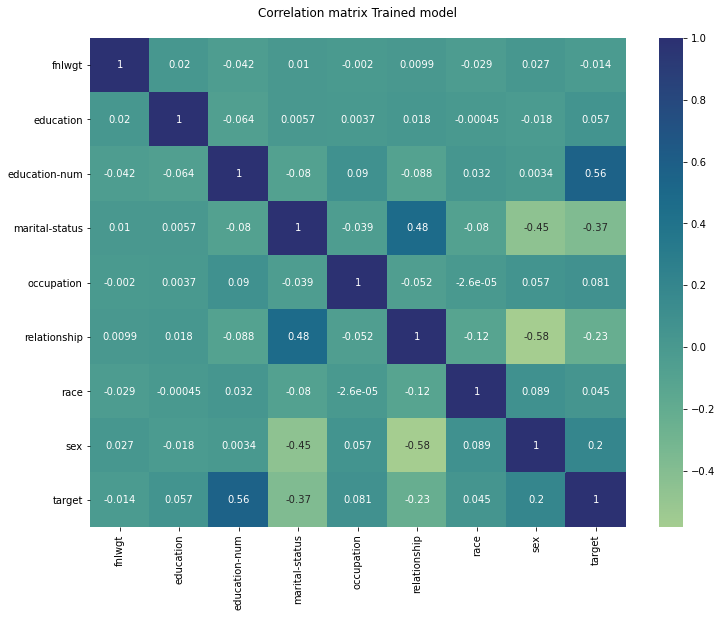

In [ ]:
all_features= pd.concat([x_train,x_test])
y_pred = best_svm_model.predict(all_features)
final_df = all_features.assign(target=y_pred)

plt.figure(figsize=(12, 9))
hm = sns.heatmap(final_df.corr(), annot = True, cmap="crest")
hm.set(title = "Correlation matrix Trained model\n")
plt.show()

# 3.3.5 Perceptron

In [21]:
from sklearn import preprocessing, neighbors
from os import system

df1=df.copy()
df1=df1.apply(preprocessing.LabelEncoder().fit_transform)
ss = preprocessing.StandardScaler().fit(df1.drop('class-label',axis=1))
x_train=ss.transform(df1.drop('class-label',axis=1))
y_train = df['class-label'].to_numpy()

df2=df_test.copy()
df2=df2.apply(preprocessing.LabelEncoder().fit_transform)
ss = preprocessing.StandardScaler().fit(df2.drop('class-label',axis=1))
x_test=ss.transform(df2.drop('class-label',axis=1))
y_test = df['class-label'].to_numpy()

x_train.shape

(30162, 10)

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim


class AdultDataset(object):
    def __init__(self, x, y):
        self.x = torch.from_numpy(x)
        self.y = torch.from_numpy(y)
        self.n = x.shape[0]

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        return  self.x[idx], self.y[idx]

train_data = AdultDataset(x_train, y_train)
test_data = AdultDataset(x_test,y_test)
trainset = DataLoader(train_data, batch_size = 10, shuffle = True)
testset = DataLoader(test_data, batch_size = 10, shuffle = True)
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

In [28]:
#Perceptron
class AdultNet(nn.Module):
    def __init__(self, input_size , hidden_size, num_classes):
        super(AdultNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = self.fc2(out)
        return F.log_softmax(out, dim = 1)
model = AdultNet(10,10,2)
print(model)

AdultNet(
  (fc1): Linear(in_features=10, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)


In [44]:
X = torch.rand(10)
X = X.view(-1,10)
output = model(X)
output

tensor([[-0.4302, -1.0509]], grad_fn=<LogSoftmaxBackward>)

In [45]:
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [46]:
EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        x, y = data
        model.zero_grad()
        output = model(x.view(-1,10).float())
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.2757, grad_fn=<NllLossBackward>)
tensor(0.9293, grad_fn=<NllLossBackward>)
tensor(0.0115, grad_fn=<NllLossBackward>)


In [47]:
correct = 0
total = 0
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0
with torch.no_grad():
    for data in testset:
        X, y = data
        output = model(X.view(-1,10).float())
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
                if torch.argmax(i):
                    true_pos += 1
                else:
                    true_neg += 1
            else:
                if torch.argmax(i):
                    false_pos += 1
                else:
                    false_neg += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.656


In [53]:
#finding best learning rate.
import torch.optim.lr_scheduler as lr_scheduler

lambda_fct = lambda epoch: 0.95**epoch
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda_fct)
print(optimizer.state_dict()['param_groups'][0]['lr'])
for epoch in range(20):
    #train
    model.train()
    for data in trainset:
        x, y = data
        model.zero_grad()
        optimizer.zero_grad()
        output = model(x.view(-1,10).float())
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    #validate:
    correct_ = 0
    total_ = 0
    with torch.no_grad():
        for data in testset:
            X, y = data
            output = model(X.view(-1,10).float())
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct_ +=1
                total_ += 1
    print("Accuracy: ", round(correct_/total_, 3))
    #scheduler.step
    scheduler.step()
    print(optimizer.state_dict()['param_groups'][0]['lr'])

0.001
Accuracy:  0.65
0.00095
Accuracy:  0.64
0.0009025
Accuracy:  0.66
0.000857375
Accuracy:  0.646
0.0008145062499999999
Accuracy:  0.654
0.0007737809374999998
Accuracy:  0.637
0.0007350918906249999
Accuracy:  0.655
0.0006983372960937497
Accuracy:  0.655
0.0006634204312890623
Accuracy:  0.647
0.0006302494097246091
Accuracy:  0.655
0.0005987369392383787
Accuracy:  0.65
0.0005688000922764596
Accuracy:  0.653
0.0005403600876626366
Accuracy:  0.656
0.0005133420832795048
Accuracy:  0.648
0.00048767497911552955
Accuracy:  0.655
0.000463291230159753
Accuracy:  0.66
0.00044012666865176535
Accuracy:  0.65
0.0004181203352191771
Accuracy:  0.646
0.0003972143184582182
Accuracy:  0.655
0.00037735360253530727
Accuracy:  0.652
0.0003584859224085419


In [49]:
#confusion matrix
con_mat = pd.DataFrame({'positive-pred':[true_pos, false_pos],'negative-pred':[false_neg,true_neg]})
con_mat

,positive-pred,negative-pred
0,778,2942
1,2242,9098


In [50]:
specificity_1 = true_neg/(true_neg+false_pos)
sensitivity_1 = true_pos/(true_pos+false_neg)
precision_1 = true_pos/(true_pos+false_pos)
f1_score_1 = ((precision_1*sensitivity_1*2)/(precision_1+sensitivity_1))
specificity_0 = true_pos/(true_pos+false_neg)
sensitivity_0 = true_neg/(true_neg+false_pos)
precision_0 = true_neg/(true_neg+false_neg)
f1_score_0 = ((precision_0*sensitivity_0*2)/(precision_0+sensitivity_0))
print("specificity for class 0: ", specificity_0)
print('sensitivity for class 0: ', sensitivity_0)
print('precision for class 0: ', precision_0)
print('f1_score for class 0: ',f1_score_0)
print("specificity for class 1: ", specificity_1)
print('sensitivity for class 1: ', sensitivity_1)
print('precision for class 1: ', precision_1)
print('f1_score for class 1: ',f1_score_1)

specificity for class 0:  0.20913978494623656
sensitivity for class 0:  0.8022927689594356
precision for class 0:  0.7556478405315614
f1_score for class 0:  0.7782720273738237
specificity for class 1:  0.8022927689594356
sensitivity for class 1:  0.20913978494623656
precision for class 1:  0.2576158940397351
f1_score for class 1:  0.23086053412462906


In [36]:
#ROC curve:
print('x = False Positive Rate: ', 1-specificity)
print('y = True Positive Rate: ', sensitivity)

x = False Positive Rate:  0.19444444444444442
y = True Positive Rate:  0.20349462365591398


# Result

In [42]:
import numpy as np
import pandas as pd

acc_result = np.array([[0.83],[0.82], [0.82], [0.82],[0.66]])
acc_result.reshape(1,5)
data = {'Classifier': ['DTs', 'KNN', 'NB', 'svm', 'Perceptron'], 'Accuracy': [0.83, 0.82, 0.82, 0.82, 0.66],
        'precision_class_0':[0.86,0.86, 0.86, 0.84, 0], 'precision_class_1':[0.68, 0.66, 0.66, 0.71, 0], 
        'recall_class_0':   [0.91, 0.91, 0.91, 0.94, 0],'recall_class_1':   [0.56, 0.55, 0.55, 0.44, 0], 
        'f1-score_class_0': [0.89, 0.88, 0.88, 0.89, 0], 'f1-score_class_1':[0.61, 0.60, 0.60, 0.55, 0]}
df_result = pd.DataFrame(data)
df_result

,Classifier,Accuracy,precision_class_0,precision_class_1,recall_class_0,recall_class_1,f1-score_class_0,f1-score_class_1
0,DTs,0.83,0.86,0.68,0.91,0.56,0.89,0.61
1,KNN,0.82,0.86,0.66,0.91,0.55,0.88,0.60
2,NB,0.82,0.86,0.66,0.91,0.55,0.88,0.60
3,svm,0.82,0.84,0.71,0.94,0.44,0.89,0.55
4,Perceptron,0.66,0.00,0.00,0.00,0.00,0.00,0.00


Text(0, 0.5, 'Accuracy')

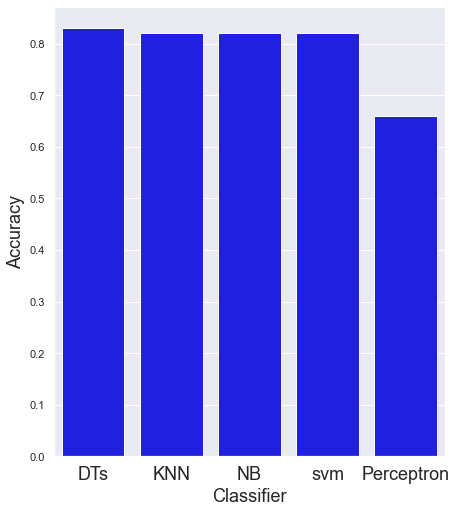

In [45]:
import seaborn as sns         
plot_ac = sns.barplot(data =df_result, x = 'Classifier', y='Accuracy', color='blue')
sns.set(rc={'figure.figsize':(7,8.27)})

plot_ac.set_xticklabels(plot_ac.get_xmajorticklabels(), fontsize = 18)
plot_ac.set_xlabel("Classifier",fontsize=18)
plot_ac.set_ylabel("Accuracy",fontsize=18)


In [38]:

#kNN
def kNN(data, labels, new, dist_func, k):
    distances = []
    for idx in range(len(data)):
        distances.append([dist_func(data[idx],new),labels[idx]])
    distances = sorted(distances)
    assigned_label = {0:0 , 1:0}
    for idx in range(k):
        assigned_label[distances[k][1]] += 1
    return max(assigned_label,key = assigned_label.get)  

In [39]:
#distance func:
def L1_dist(arr1,arr2):
    res = 0
    for i in range(len(arr1)):
        res += abs(arr1[i] - arr2[i])
    return res
def L2_dist(arr1,arr2):
    return np.linalg.norm(arr1-arr2)

In [41]:
correct = 0
total = 0
x = x_train
y = y_train
for idx in range(100):
    guess = kNN(x,y,x_test[idx],L2_dist,100)
    if guess == y_test[idx]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.64
